# Import libraries


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

#OLS library for linear regression

In [2]:
import statsmodels.api as sm

#Visualisation

In [3]:
import pylab
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.metrics import mean_squared_error

In [5]:
import scipy.stats as stats

#VIF -> Variable Infliation factor

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#VIF check correlation amongs features and find out which feature has maximum strength of correlation

#faeture selection for classification

In [7]:
from sklearn.feature_selection import f_classif

In [8]:
data = pd.read_csv('F:\DATA SCIENCE\python\py\ALGORITHMS\Logistic regression\heart.csv')

data


,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,1,145,233,1,2,150,0,2.3,3,0,fixed,No
1,67,Male,4,160,286,0,2,108,1,1.5,2,3,normal,Yes
2,67,Male,4,120,229,0,2,129,1,2.6,2,2,reversible,No
3,37,Male,3,130,250,0,0,187,0,3.5,3,0,normal,No
4,41,Female,2,130,204,0,2,172,0,1.4,1,0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,52,Male,1,118,186,0,2,190,0,0.0,2,0,fixed,No
299,43,Female,4,132,341,1,2,136,1,3.0,2,0,reversible,Yes
300,65,Male,4,135,254,0,2,127,0,2.8,2,1,reversible,Yes
301,48,Male,4,130,256,1,2,150,1,0.0,1,2,reversible,Yes


# Data Exploration

In [ ]:
data.head(3)

In [9]:
data.dtypes

age           int64
gender       object
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal         object
target       object
dtype: object

In [10]:
# get the count of Y
data.target.value_counts()

No     220
Yes     83
Name: target, dtype: int64

# Data treatments 
#i) to convert Y variable into numbers<br>
use labelencoder

In [11]:
le = LabelEncoder() 
data['Y'] = le.fit_transform(data.target)
data.head(5)
# drop the old Y-variable
data = data.drop('target',axis=1)
# rename Y to old Y-value
data = data.rename(columns={'Y':'target'})
data.target#so here ther is no any as.factor option so we convert yes no in 1 and 0
# split the columns into Numeric-nc and factors-fc

0      0
1      1
2      0
3      0
4      0
      ..
298    0
299    1
300    1
301    1
302    1
Name: target, Length: 303, dtype: int32

In [14]:
# split the columns into Numeric-nc and factors-fc
nc = data.select_dtypes(exclude='object').columns.values
nc
#12 columns are numebric



array(['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'target'], dtype=object)

In [13]:
fc = data.select_dtypes(include='object').columns.values
fc
# 2 columns are Factorial

array(['gender', 'thal'], dtype=object)

# EDA 


<AxesSubplot:>

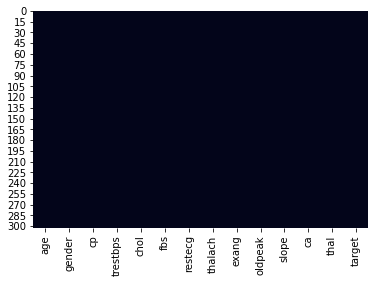

In [15]:
# NUll check
data.isnull().sum()
sns.heatmap(data.isnull(),cbar=False) #so it shows no nulls arae there

# 0 check

In [16]:
data[nc][data[nc]==0].count()
#so here we got lot of zeros in 6 columns

age           0
cp            4
trestbps      0
chol          0
fbs         258
restecg     149
thalach       0
exang       204
oldpeak      97
slope         0
ca          176
target      220
dtype: int64

#treatment on column which have ZEROS
#Column is "FBS"

In [17]:
data.fbs.value_counts()
258/len(data)#85.14 % is singualrity in this col

0.8514851485148515

#Column is "restecg"

In [18]:
data.restecg.value_counts()
#its multiclass column where ther eis no singularity

0    149
2    146
1      8
Name: restecg, dtype: int64

olumn is ca

In [19]:
data.ca.value_counts()
#thisis also multiclass factor

0    176
1     67
2     40
3     20
Name: ca, dtype: int64

#analyse the factor columns

In [22]:
for f in fc:
    print("Factor Column = ", f)
    print(data[f].unique())
    print("\n")

Factor Column =  gender
['Male' 'Female']


Factor Column =  thal
['fixed' 'normal' 'reversible' '1' '2']




#'thal' column has invalid levels that have to be imputed

In [23]:
data.thal.value_counts()

normal        168
reversible    115
fixed          18
2               1
1               1
Name: thal, dtype: int64

#merge '1' and '2' into the level 'fixed'

In [24]:
data.thal[data.thal.isin(['1','2'])] = 'fixed'

<ipython-input-24-9df17838092d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.thal[data.thal.isin(['1','2'])] = 'fixed'


verify the change

# Feature Engineering

In [25]:
data.thal.value_counts()

normal        168
reversible    115
fixed          20
Name: thal, dtype: int64

#count plot to check the y-distribution

Text(0.5, 1.0, 'Y-value distribution')

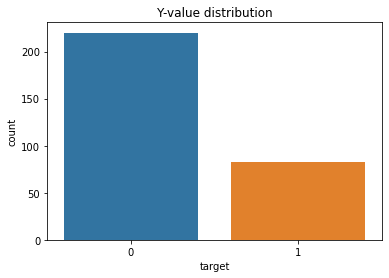

In [26]:
sns.countplot(x = 'target', data=data)
plt.title('Y-value distribution')

#dummy variable

In [27]:
pd.get_dummies(data.gender).head(20)
pd.get_dummies(data.gender, drop_first=True).head(10)

,Male
0,1
1,1
2,1
3,1
4,0
5,1
6,0
7,0
8,1
9,1


#convert factor to dummies

In [28]:
new_data = data.copy()

In [29]:
for f in fc:
    dummy = pd.get_dummies(data[f],drop_first=True,prefix=f)
    new_data = new_data.join(dummy)
    
new_data.head(5)

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,gender_Male,thal_normal,thal_reversible
0,63,Male,1,145,233,1,2,150,0,2.3,3,0,fixed,0,1,0,0
1,67,Male,4,160,286,0,2,108,1,1.5,2,3,normal,1,1,1,0
2,67,Male,4,120,229,0,2,129,1,2.6,2,2,reversible,0,1,0,1
3,37,Male,3,130,250,0,0,187,0,3.5,3,0,normal,0,1,1,0
4,41,Female,2,130,204,0,2,172,0,1.4,1,0,normal,0,0,1,0


In [30]:
new_cols = new_data.columns
new_cols

Index(['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'gender_Male',
       'thal_normal', 'thal_reversible'],
      dtype='object')

#remove the original factors

In [31]:
new_cols = list(set(new_cols) - set(fc))
new_cols

['thalach',
 'exang',
 'age',
 'chol',
 'oldpeak',
 'trestbps',
 'ca',
 'cp',
 'restecg',
 'thal_reversible',
 'fbs',
 'slope',
 'gender_Male',
 'target',
 'thal_normal']

#refresh the new dataset with the new columns

In [32]:
new_data = new_data[new_cols]
new_data

,thalach,exang,age,chol,oldpeak,trestbps,ca,cp,restecg,thal_reversible,fbs,slope,gender_Male,target,thal_normal
0,150,0,63,233,2.3,145,0,1,2,0,1,3,1,0,0
1,108,1,67,286,1.5,160,3,4,2,0,0,2,1,1,1
2,129,1,67,229,2.6,120,2,4,2,1,0,2,1,0,0
3,187,0,37,250,3.5,130,0,3,0,0,0,3,1,0,1
4,172,0,41,204,1.4,130,0,2,2,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,190,0,52,186,0.0,118,0,1,2,0,0,2,1,0,0
299,136,1,43,341,3.0,132,0,4,2,1,1,2,0,1,0
300,127,0,65,254,2.8,135,1,4,2,1,0,2,1,1,0
301,150,1,48,256,0.0,130,2,4,2,1,1,1,1,1,0


# split the data into train and test

In [33]:
trainx,testx,trainy,testy = train_test_split(
    new_data.drop('target',axis=1),
    new_data['target'],
    test_size=0.25)

In [34]:
trainx
trainy
testy

234    0
243    0
72     1
79     0
84     0
      ..
148    0
174    0
135    1
250    0
180    0
Name: target, Length: 76, dtype: int32

In [35]:
print('trainx={}, trainy={}, testx={}, test={}'.format(trainx.shape,trainy.shape,testx.shape,testy.shape))
# build the logistic regression model using Logit()
import statsmodels.api as sm 
#in logistic regression Logit is the maths behind classification
#in linear regression OLS(ordinary least squarre is math behind regression)
m1 = sm.Logit(trainy,trainx).fit()

trainx=(227, 14), trainy=(227,), testx=(76, 14), test=(76,)
Optimization terminated successfully.
         Current function value: 0.304674
         Iterations 7


# model Bulding

In [36]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  227
Model:                          Logit   Df Residuals:                      213
Method:                           MLE   Df Model:                           13
Date:                Sat, 22 May 2021   Pseudo R-squ.:                  0.4877
Time:                        23:44:40   Log-Likelihood:                -69.161
converged:                       True   LL-Null:                       -135.01
Covariance Type:            nonrobust   LLR p-value:                 9.564e-22
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
thalach            -0.0261      0.009     -2.907      0.004      -0.044      -0.008
exang               0.7230      0.497      1.455      0.146      -0.251       1.697
age                -0.0213      0.028     -0.769      0.442      -0.076       0.033
chol                0.0020      0.004      0.451      0.652      -0.007       0.011
oldpeak             0.5419      0.247      2.190      0.028       0.057       1.027
trestbps           -0.0125      0.012     -1.073      0.283      -0.035       0.010
ca                  0.9783      0.258      3.798      0.000       0.474       1.483
cp                  0.5784      0.263      2.201      0.028       0.063       1.093
restecg             0.1356      0.235      0.576      0.565      -0.326       0.597
thal_reversible     1.0700      0.789      1.356      0.175      -0.477       2.617
fbs                 1.4573      0.690      2.112      0.035       0.105       2.810
slope               0.3129      0.435      0.718      0.473      -0.541       1.166
gender_Male         0.2484      0.564      0.441      0.659      -0.856       1.353
thal_normal        -0.4315      0.827     -0.522      0.602      -2.052       1.189
===================================================================================
"""

#beta values for individual features

In [37]:
m1.params

thalach           -0.026077
exang              0.722995
age               -0.021293
chol               0.001983
oldpeak            0.541851
trestbps          -0.012509
ca                 0.978325
cp                 0.578405
restecg            0.135555
thal_reversible    1.070036
fbs                1.457345
slope              0.312860
gender_Male        0.248443
thal_normal       -0.431483
dtype: float64

# K-Fold Cross Validation

In [38]:
from sklearn.metrics import accuracy_score


In [39]:
folds = 5
cv_acc = []

In [40]:
X = trainx.values
Y = trainy.values

In [41]:
kf = KFold(folds)
# kf.get_n_splits(X)

kf.get_n_splits(X)

In [42]:
for train_index,test_index in kf.split(X):
    cv_trainx,cv_trainy = X[train_index], Y[train_index]
    cv_testx, cv_testy = X[test_index],Y[test_index]

    # build model on cv_train and predict on cv_test
    m = sm.Logit(cv_trainy,cv_trainx).fit()
    p = m.predict(cv_testx)
    
    # convert prediction into clases
    p_Y = p.copy()
    
    # take the cuttpf as 0.5
    p_Y[p_Y < 0.5] = 0
    p_Y[p_Y > 0.5] = 1
        
    
    # calculate the accuracy 
    cv_acc.append(np.round(accuracy_score(cv_testy,p_Y),3))
    
# print the CV accuracies
print(cv_acc)

Optimization terminated successfully.
         Current function value: 0.310072
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.297831
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.281882
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.289278
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.305034
         Iterations 7
[0.891, 0.826, 0.756, 0.756, 0.867]


train accuracy

In [43]:
np.round(np.mean(cv_acc),2)    
  
# prediction on the test data
p1 = m1.predict(testx)

convert probabilities into classes

In [44]:
p1_Y = p1.copy()
p1_Y[p1_Y < 0.5] = 0
p1_Y[p1_Y > 0.5] = 1

# Confusion MAtrix

In [ ]:
# from sklearn.metrics import confusion_matrix
# Confusion matrix
# method 1
confusion_matrix(testy,p1_Y)

method 2

In [46]:
df = pd.DataFrame({'actual':testy,'predicted':p1_Y})
pd.crosstab(df.actual,df.predicted,margins=True)

predicted,0.0,1.0,All
actual,,,
0,51,6,57
1,5,14,19
All,56,20,76


classification_report

In [47]:
from sklearn.metrics import classification_report
print(classification_report(testy,p1_Y))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        57
           1       0.70      0.74      0.72        19

    accuracy                           0.86        76
   macro avg       0.81      0.82      0.81        76
weighted avg       0.86      0.86      0.86        76



#a

In [48]:
print(accuracy_score(testy,p1_Y))

0.8552631578947368



# AUC / ROC

In [49]:
from sklearn import metrics
fpr,tpr,threshold = metrics.roc_curve(testy,p1_Y)

auc score

In [50]:
auc_score = metrics.auc(fpr,tpr)
print('AUC for the model = ', auc_score)

AUC for the model =  0.8157894736842105


# plot the ROC

Text(0, 0.5, 'TPR')

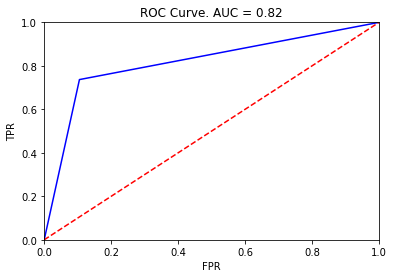

In [51]:
plt.plot(fpr,tpr,'b')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC Curve. AUC = ' + str(round(auc_score,2)))
plt.xlabel('FPR')
plt.ylabel('TPR')

How to make this model better<br>
----------------------------<br>
try changing the cutoff<br>
check collinearity

# Model 2nd With selected Features

Text(0.5, 1.0, 'correlation Matrix')

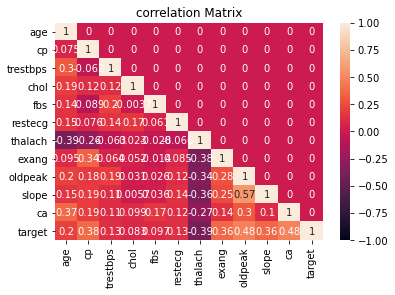

In [52]:
cor = data[nc].corr()
cor = np.tril(cor)
# sns.set(font_scale=0.50) - to adjust size of font in table
sns.heatmap(cor,xticklabels=nc,yticklabels=nc,
            vmin=-1,vmax=1,annot=True,square=False)
plt.title("correlation Matrix")

feature selection<br>
try to get more records of +ve class<br>
try to change the train/test ratio

feature selection

In [53]:
features = trainx.columns
scores, pval = f_classif(trainx, trainy)

store the feature's score in Dataframe<br>
cols = ['feature','score','pvalue']

In [54]:
df_scores = pd.DataFrame({'feature':features,
                         'score':scores,
                         'pvalue':pval})

sort the dataset in the descending order of Scores

In [55]:
df_scores.sort_values('score',ascending=False,inplace=True)
df_scores

,feature,score,pvalue
6,ca,69.749818,6.908163e-15
13,thal_normal,57.059138,1.052914e-12
9,thal_reversible,49.752311,2.127155e-11
4,oldpeak,47.807670,4.804313e-11
1,exang,44.425608,2.012446e-10
0,thalach,39.852705,1.442019e-09
7,cp,38.141864,3.042891e-09
11,slope,27.813450,3.132199e-07
2,age,12.469542,5.016693e-04
12,gender_Male,7.985348,5.139905e-03


------------------------------------------------

create new model on the basis of highly score

In [56]:
new_data2 = new_data[['ca','thalach','oldpeak','thal_normal','cp','thal_reversible','thalach','exang','slope','age','target']]

split data

In [57]:
trainx,testx,trainy,testy = train_test_split(
    new_data.drop('target',axis=1),
    new_data['target'],
    test_size=0.30)

model buid

In [58]:
m2 = sm.Logit(trainy,trainx).fit()

Optimization terminated successfully.
         Current function value: 0.314367
         Iterations 7


In [59]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  212
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                           13
Date:                Sat, 22 May 2021   Pseudo R-squ.:                  0.4684
Time:                        23:46:57   Log-Likelihood:                -66.646
converged:                       True   LL-Null:                       -125.36
Covariance Type:            nonrobust   LLR p-value:                 6.452e-19
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
thalach            -0.0293      0.009     -3.214      0.001      -0.047      -0.011
exang              -0.1161      0.528     -0.220      0.826      -1.150       0.918
age                -0.0369      0.030     -1.230      0.219      -0.096       0.022
chol                0.0073      0.006      1.302      0.193      -0.004       0.018
oldpeak             0.5839      0.237      2.459      0.014       0.118       1.049
trestbps           -0.0037      0.013     -0.282      0.778      -0.030       0.022
ca                  0.9971      0.272      3.664      0.000       0.464       1.530
cp                  0.5844      0.256      2.282      0.023       0.082       1.086
restecg             0.1510      0.236      0.640      0.522      -0.311       0.613
thal_reversible     0.0942      0.838      0.112      0.910      -1.547       1.736
fbs                 0.5252      0.587      0.895      0.371      -0.625       1.676
slope               0.3499      0.419      0.835      0.404      -0.471       1.171
gender_Male         0.2404      0.590      0.407      0.684      -0.916       1.397
thal_normal        -1.3551      0.894     -1.515      0.130      -3.108       0.398
===================================================================================
"""

In [60]:
  
# prediction on the test data
p2 = m2.predict(testx)

convert probabilities into classes

In [61]:
p2_Y = p2.copy()
p2_Y[p2_Y < 0.5] = 0
p2_Y[p2_Y > 0.5] = 1

In [62]:
from sklearn.metrics import confusion_matrix
# Confusion matrix
# method 1
confusion_matrix(testy,p2_Y)

array([[62,  5],
       [ 8, 16]], dtype=int64)

method 2

In [63]:
df = pd.DataFrame({'actual':testy,'predicted':p2_Y})
pd.crosstab(df.actual,df.predicted,margins=True)

predicted,0.0,1.0,All
actual,,,
0,62,5,67
1,8,16,24
All,70,21,91


classification_report

In [64]:
from sklearn.metrics import classification_report
print(classification_report(testy,p2_Y))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        67
           1       0.76      0.67      0.71        24

    accuracy                           0.86        91
   macro avg       0.82      0.80      0.81        91
weighted avg       0.85      0.86      0.85        91



accuracy score

In [65]:
np.round(accuracy_score(testy,p2_Y),3)

0.857

AUC / ROC

In [66]:
from sklearn import metrics
fpr,tpr,threshold = metrics.roc_curve(testy,p2_Y)

auc score

In [67]:
auc_score2 = metrics.auc(fpr,tpr)
print('AUC for the model = ', auc_score2)

AUC for the model =  0.7960199004975124


OC for 2nd model<br>
plot the ROC

Text(0, 0.5, 'TPR')

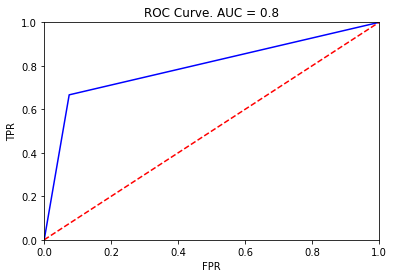

In [68]:
plt.plot(fpr,tpr,'b')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC Curve. AUC = ' + str(round(auc_score2,2)))
plt.xlabel('FPR')
plt.ylabel('TPR')